In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


PATH='/Users/nicholashedger/Documents'

In [13]:
def load_data(PATH,FILE):
	csvpath=os.path.join(PATH,FILE)
	return pd.read_csv(csvpath)


TIMESERIES=load_data(PATH,'TIMESERIES2_CLEAN.csv') # The full timeseries data.
SIDELAB=load_data(PATH,'SIDELABELS_CLEAN.csv') # The labels corresponding to the location of the social image.
SIDELAB=SIDELAB.drop('Unnamed: 0',1)

In [3]:
TIMESERIES.head()

,Unnamed: 0,id,time,X,Y,ps
0,1,1,1,762.3,639.5,1
1,2,1,2,762.3,639.5,1
2,3,1,3,762.3,639.5,1
3,4,1,4,762.3,639.5,1
4,5,1,5,762.3,639.5,1


In [4]:
len(np.unique(TIMESERIES["id"]))

2963

In [5]:
SIDELAB.head()

,Unnamed: 0,side
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1


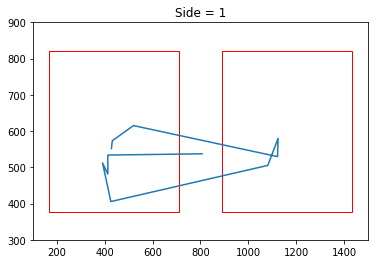

In [20]:
# Plot a timeseries and add some bells and whistles. Plot where the stimuli are and a title indicating whether
# it was a scrambled or intact trial.
import matplotlib.patches as patches

def tsplot(FRAME,id):
    fig1, ax =plt.subplots(1)
    instance=FRAME[(FRAME["id"]==id)]
    plt.plot(instance['X'],instance['Y'])
    plt.axis([100,1500,300,900])
    rect=patches.Rectangle((168,378),544,444,facecolor='none',edgecolor='r') # Plot the grid area
    rect2=patches.Rectangle((888,378),544,444,facecolor='none',edgecolor='r')
    ax.add_patch(rect)
    ax.add_patch(rect2)
    num=SIDELAB.iloc[id-1,0] # Reference the timeseries with the label. 
    lab="Side = %d" % (num)
    plt.title(lab)
    plt.show()
    
x=tsplot(TIMESERIES,100)

In [21]:
# Drop columns not required.
TIMESERIES=TIMESERIES.drop('Unnamed: 0',1)

In [22]:
LABELS=SIDELAB
LABELSPREP=pd.DataFrame.as_matrix(LABELS)
LABELSPREP=np.squeeze(LABELSPREP)
LABELSPREP.shape

(2963,)

In [24]:
from tsfresh import extract_relevant_features
features_filtered_direct = extract_relevant_features(TIMESERIES, LABELSPREP,
                                                     column_id='id', column_sort='time')

/Users/nicholashedger/anaconda2/envs/env/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Feature Extraction: 10it [1:17:27, 464.74s/it]                      
 'X__friedrich_coefficients__m_3__r_30__coeff_1'
 'X__friedrich_coefficients__m_3__r_30__coeff_2'
 'X__friedrich_coefficients__m_3__r_30__coeff_3'
 'X__max_langevin_fixed_point__m_3__r_30'
 'Y__friedrich_coefficients__m_3__r_30__coeff_0'
 'Y__friedrich_coefficients__m_3__r_30__coeff_1'
 'Y__friedrich_coefficients__m_3__r_30__coeff_2'
 'Y__friedrich_coefficients__m_3__r_30__coeff_3'
 'Y__max_langevin_fixed_point__m_3__r_30'
 'ps__augmented_dickey_fuller__attr_"pvalue"'
 'ps__augmented_dickey_fuller__attr_"teststat"'
 'ps__autocorrelation__lag_0' 'ps__autocorrelation__lag_1'
 'ps__autocorrelation__lag_2' 'ps__autocorrelation__lag_3'
 'ps_

In [25]:
# Dump the data. 
import dill                            
filename = 'T_S_dump_side_clean.pkl'
dill.dump_session(os.path.join(PATH,filename))

In [26]:
templab=pd.Series(LABELSPREP,index=np.unique(TIMESERIES["id"]))
templab.head()
templab.unique
from tsfresh.feature_selection.relevance import calculate_relevance_table
sigtable=calculate_relevance_table(X=features_filtered_direct,y=templab)

In [27]:
sigtable.head(n=10)

,feature,type,p_value,relevant
feature,,,,
"X__agg_linear_trend__f_agg_""mean""__chunk_len_50__attr_""intercept""","X__agg_linear_trend__f_agg_""mean""__chunk_len_5...",real,2.278341e-54,True
"X__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","X__agg_linear_trend__f_agg_""max""__chunk_len_10...",real,2.471520e-51,True
X__c3__lag_2,X__c3__lag_2,real,2.587083e-50,True
X__c3__lag_1,X__c3__lag_1,real,2.605460e-50,True
X__c3__lag_3,X__c3__lag_3,real,2.814577e-50,True
"X__agg_linear_trend__f_agg_""mean""__chunk_len_10__attr_""intercept""","X__agg_linear_trend__f_agg_""mean""__chunk_len_1...",real,3.444231e-50,True
"X__agg_linear_trend__f_agg_""max""__chunk_len_5__attr_""intercept""","X__agg_linear_trend__f_agg_""max""__chunk_len_5_...",real,4.128278e-50,True
"X__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""","X__agg_linear_trend__f_agg_""max""__chunk_len_50...",real,5.804213e-50,True
"X__agg_linear_trend__f_agg_""mean""__chunk_len_5__attr_""intercept""","X__agg_linear_trend__f_agg_""mean""__chunk_len_5...",real,1.092627e-49,True


In [30]:
def SHOWFEATURE(feature):
    fig, ax = plt.subplots(figsize=(20, 20))
    for i in range(4): # Plot the top 4 instances
        for j in range(2):
            ax = plt.subplot2grid((5,3), (i,j))
            if j==1: 
                league=features_filtered_direct.sort_values(by=[feature],ascending=True) # The lowest values
            else:
                league=features_filtered_direct.sort_values(by=[feature],ascending=False) # The highest values
            idt=league.iloc[[i]].index[0] # Get the id
            var=round(league[feature].iloc[i],3) # Get the value of the variable
            instance=TIMESERIES[(TIMESERIES["id"]==idt)] # Get the timeseries corresponding to the ID
            plt.axis([100,1500,300,900])
            rect=patches.Rectangle((168,378),544,444,facecolor='none',edgecolor='r') # Plot the grid area
            rect2=patches.Rectangle((888,378),544,444,facecolor='none',edgecolor='r')
            num=SIDELAB.iloc[idt-1,0] # Reference the timeseries with the label to determine whether it was scrambled or not
            ax.add_patch(rect)
            ax.add_patch(rect2)
            lab="ID= %d, var= %f Side = %d" % (idt,var,num)
            ax.set_title(lab)
            ax.plot(instance['X'],instance['Y'])

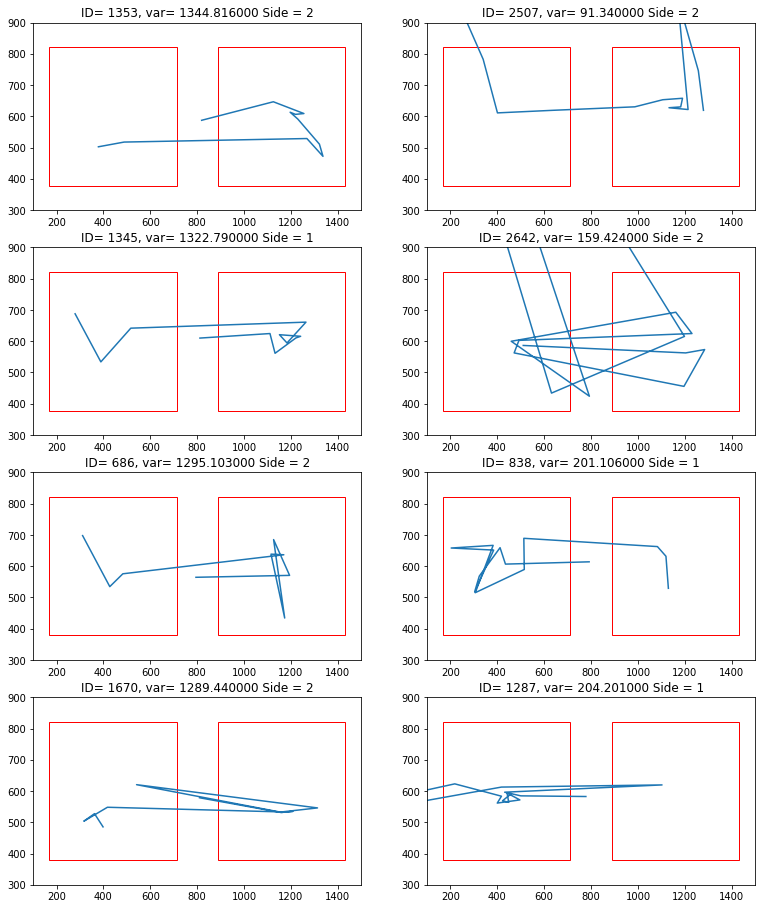

In [31]:
SHOWFEATURE('X__agg_linear_trend__f_agg_"mean"__chunk_len_50__attr_"intercept"')

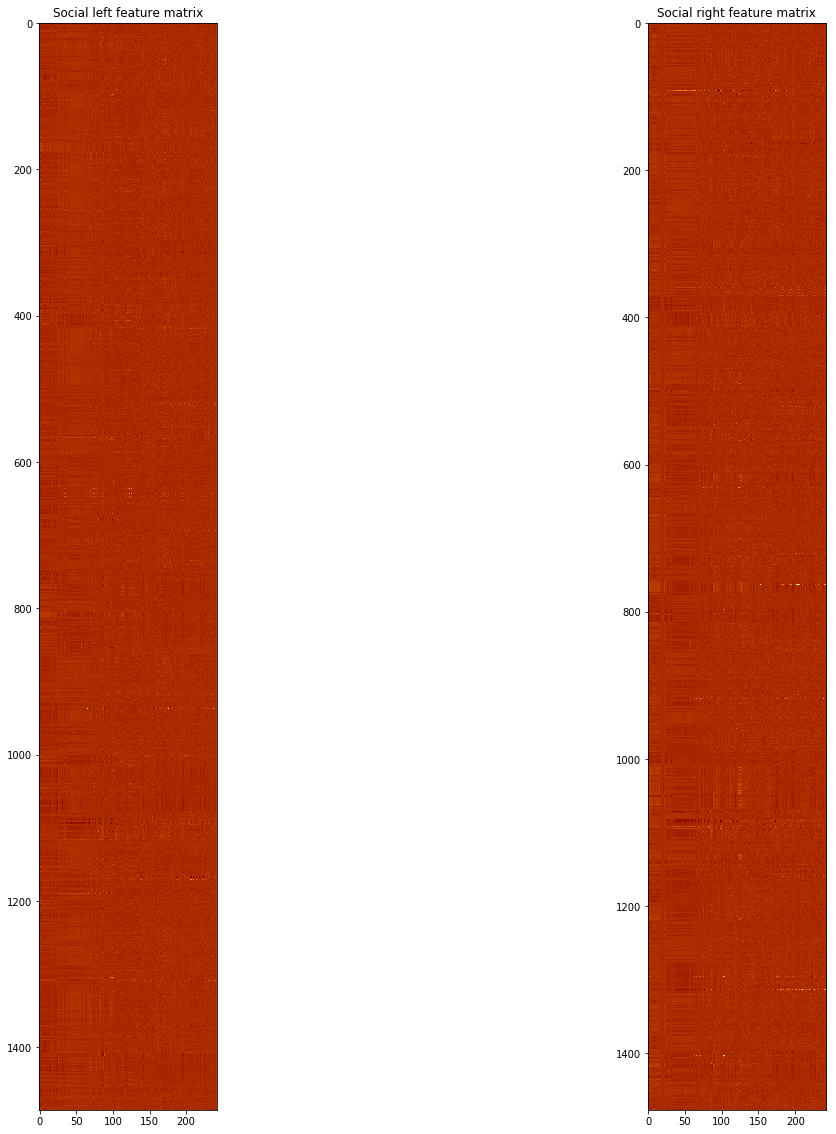

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
trans=scaler.fit(features_filtered_direct)
scaled=scaler.transform(features_filtered_direct)

scaledwithlabs=np.concatenate((scaled,np.array(pd.DataFrame(LABELS))),axis=1)
scaledwithlabs.shape
scaledint=scaledwithlabs[np.where(scaledwithlabs[:,241] == 1)]
scaledsc=scaledwithlabs[np.where(scaledwithlabs[:,241] == 2)]

from matplotlib import cm, colors
fig, ax = plt.subplots(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.imshow(scaledint,cmap='afmhot',vmin=scaled.min(), vmax=scaled.max())
plt.title("Social left feature matrix")
plt.subplot(1, 2, 2)
plt.imshow(scaledsc,cmap='afmhot',vmin=scaled.min(), vmax=scaled.max())
plt.title("Social right feature matrix")



In [34]:
scaled.shape

(2963, 241)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(scaled, LABELSPREP, test_size=.2)

In [38]:
from sklearn.ensemble import RandomForestClassifier
cl = RandomForestClassifier() 
cl.fit(X_train, y_train) # Fit to the training data

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [40]:
scoreCV=cross_val_score(cl,X_train,y_train,cv=10,scoring='accuracy') # Cross validate.

scoreCV

array([ 0.60504202,  0.6302521 ,  0.64285714,  0.64705882,  0.6092437 ,
        0.6440678 ,  0.60169492,  0.65677966,  0.62288136,  0.66101695])

In [41]:
from sklearn.metrics import classification_report # Show performance at classifying the test data
print(classification_report(y_test, cl.predict(X_test)))

             precision    recall  f1-score   support

          1       0.60      0.71      0.65       301
          2       0.63      0.52      0.57       292

avg / total       0.62      0.61      0.61       593



In [42]:
attributes=list(features_filtered_direct)

sorted(zip(cl.feature_importances_,attributes),reverse=True)

[(0.014184852751703166, 'X__c3__lag_1'),
 (0.013451020391361753,
  'X__agg_linear_trend__f_agg_"min"__chunk_len_5__attr_"intercept"'),
 (0.013239251886438572,
  'X__agg_linear_trend__f_agg_"min"__chunk_len_50__attr_"intercept"'),
 (0.012250128224580405,
  'X__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_1__w_20'),
 (0.011313192806134858, 'X__abs_energy'),
 (0.010409396579410906,
  'X__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_4__w_20'),
 (0.0099676876345347748,
  'X__agg_linear_trend__f_agg_"min"__chunk_len_10__attr_"intercept"'),
 (0.0092869706582821183,
  'X__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_13__w_10'),
 (0.0092180471932359221, 'X__quantile__q_0.7'),
 (0.0092085465866387425,
  'X__change_quantiles__f_agg_"mean"__isabs_True__qh_0.6__ql_0.0'),
 (0.0091170823066980787,
  'X__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"intercept"'),
 (0.0089474304624860591,
  'X__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_5__w_20'),
 (0.0087528967856624184, 'X__quantile__q

In [109]:
scoreCV

array([ 0.61904762,  0.63414634,  0.625     ])

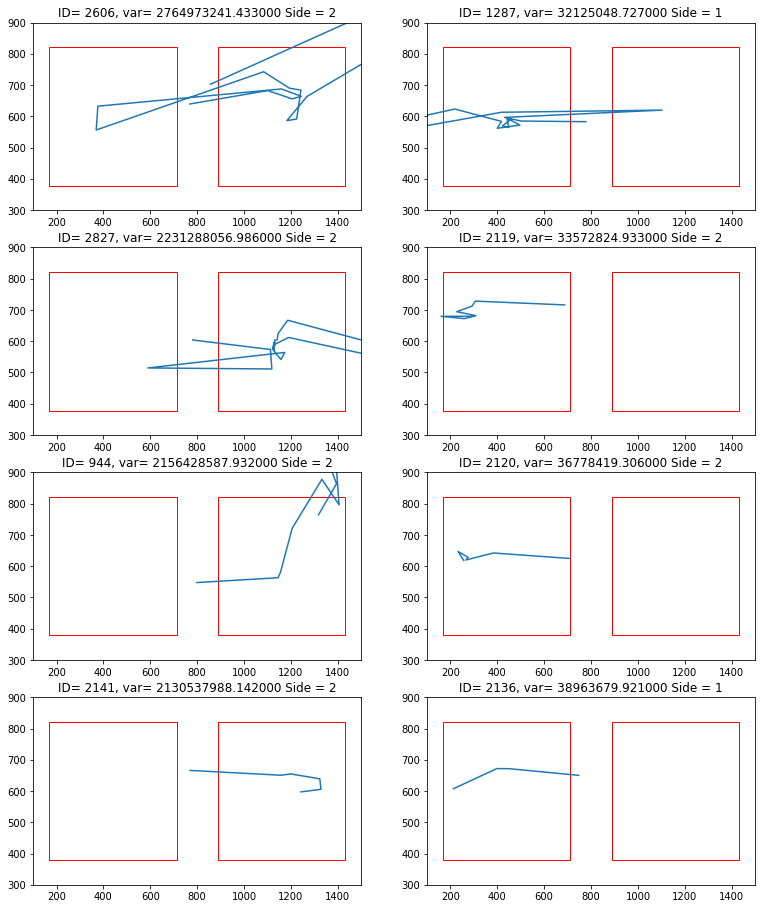

In [43]:
SHOWFEATURE('X__c3__lag_1')


In [44]:
def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])


top_k=indices_of_top_k(cl.feature_importances_,40)

toplabels=np.array(attributes)[top_k]

topkmat=np.array(features_filtered_direct)[:,top_k]


X_train, X_test, y_train, y_test = train_test_split(topkmat, LABELSPREP, test_size=.2)

from sklearn.ensemble import RandomForestClassifier

cl2 = RandomForestClassifier()
cl2.fit(X_train, y_train)

scoreCV2=cross_val_score(cl2,X_train,y_train,cv=10,scoring='accuracy')

In [45]:
scoreCV2

array([ 0.66386555,  0.63445378,  0.57563025,  0.60337553,  0.59493671,
        0.6371308 ,  0.6835443 ,  0.64830508,  0.63135593,  0.61864407])

In [85]:
scoreCV2

array([ 0.61538462,  0.38461538,  0.76923077,  0.61538462,  0.61538462,
        0.76923077,  0.91666667,  0.81818182,  0.72727273,  0.90909091])

In [46]:
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 15, 30], 'max_features': [5, 10, 20, 40],'max_depth': [10,15,20],'min_samples_leaf': [15,20,30],'warm_start':[True,False]}]


from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(cl2, param_grid, cv=5,scoring='accuracy')

grid_search.fit(X_train, y_train)


cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

(0.63080168776371304, {'max_features': 5, 'n_estimators': 3, 'warm_start': True, 'max_depth': 10, 'min_samples_leaf': 15})
(0.62995780590717299, {'max_features': 5, 'n_estimators': 3, 'warm_start': False, 'max_depth': 10, 'min_samples_leaf': 15})
(0.66244725738396626, {'max_features': 5, 'n_estimators': 10, 'warm_start': True, 'max_depth': 10, 'min_samples_leaf': 15})
(0.65822784810126578, {'max_features': 5, 'n_estimators': 10, 'warm_start': False, 'max_depth': 10, 'min_samples_leaf': 15})
(0.65696202531645564, {'max_features': 5, 'n_estimators': 15, 'warm_start': True, 'max_depth': 10, 'min_samples_leaf': 15})
(0.66708860759493671, {'max_features': 5, 'n_estimators': 15, 'warm_start': False, 'max_depth': 10, 'min_samples_leaf': 15})
(0.66666666666666663, {'max_features': 5, 'n_estimators': 30, 'warm_start': True, 'max_depth': 10, 'min_samples_leaf': 15})
(0.66497890295358653, {'max_features': 5, 'n_estimators': 30, 'warm_start': False, 'max_depth': 10, 'min_samples_leaf': 15})
(0.637

In [47]:
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

             precision    recall  f1-score   support

          1       0.69      0.65      0.67       313
          2       0.63      0.67      0.65       280

avg / total       0.66      0.66      0.66       593

